In [2]:

from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.drop(['User ID'], axis=1,inplace=True)

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [8]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
df_encoded = pd.get_dummies(df, columns=['Gender'])

df_encoded.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [10]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<ipython-input-11-baed6431ca44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

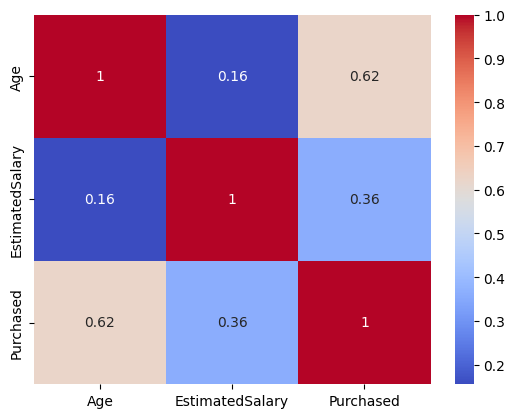

In [11]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [12]:
print(corr)

                      Age  EstimatedSalary  Purchased
Age              1.000000         0.155238   0.622454
EstimatedSalary  0.155238         1.000000   0.362083
Purchased        0.622454         0.362083   1.000000


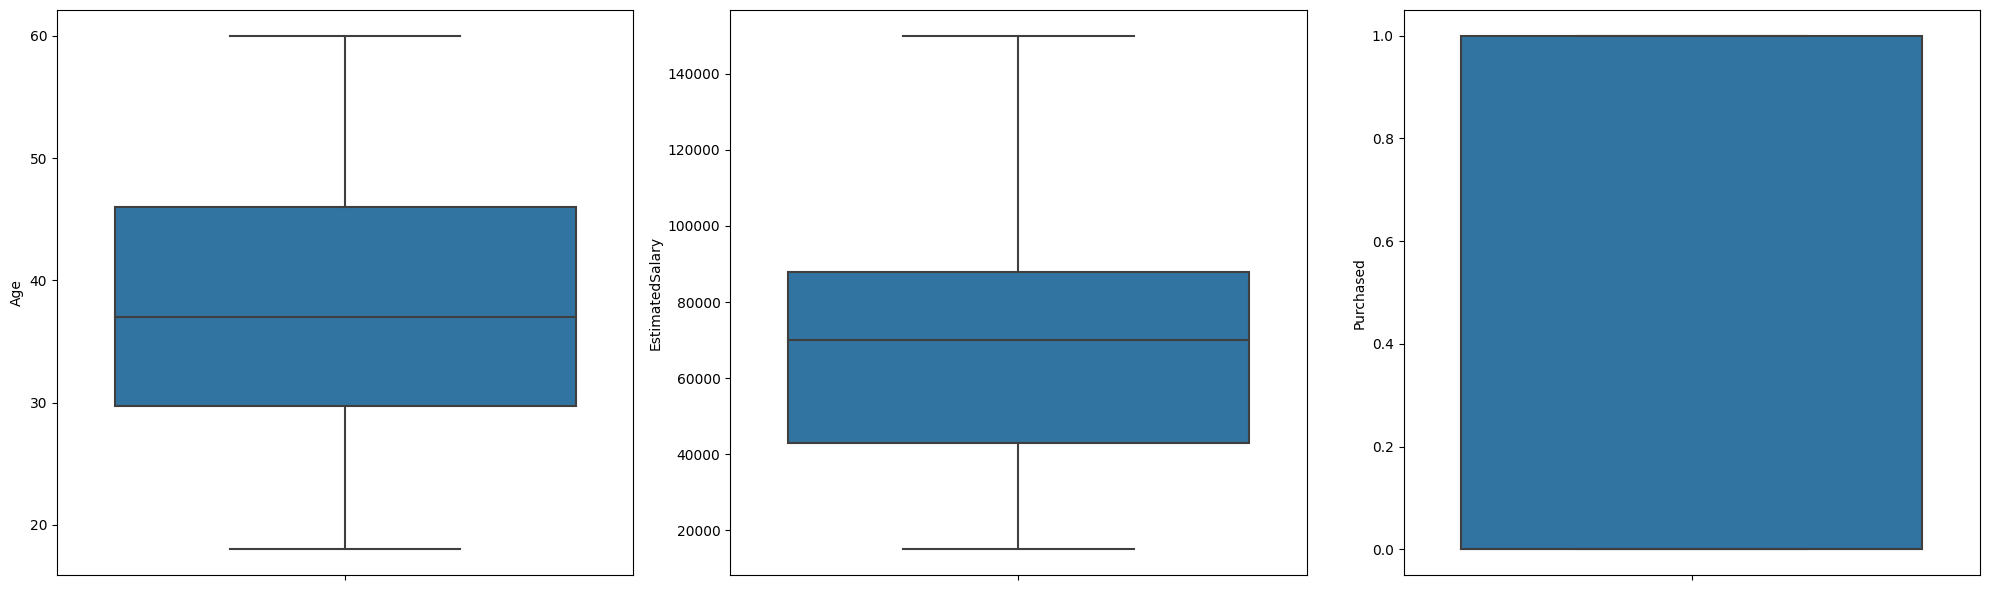

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))
ax = ax.flatten()

# Select columns for boxplots
columns = ['Age', 'EstimatedSalary', 'Purchased']

# Generate boxplots for each column
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=df, ax=ax[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the boxplots
plt.show()

In [14]:
X=df.drop(['Gender','Purchased'],axis=1)
Y= df['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
basemodel= LogisticRegression()
basemodel.fit(X_train,y_train)
print("Training accuracy:", basemodel.score(X_train,y_train)*100)

Training accuracy: 66.04477611940298


In [16]:
columns_to_normalize = ["Age", "EstimatedSalary"]
for col in columns_to_normalize:
  min_val = df[col].min()
  max_val = df[col].max()
  df[col] = (df[col] - min_val) / (max_val - min_val)

df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,0.023810,0.029630,0
1,Male,0.404762,0.037037,0
2,Female,0.190476,0.207407,0
3,Female,0.214286,0.311111,0
4,Male,0.023810,0.451852,0


In [17]:
model = LogisticRegression()
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Training accuracy:", model.score(X_train,y_train)*100)
print("Testing accuracy:", model.score(X_test,y_test)*100)

Training accuracy: 81.71641791044776
Testing accuracy: 82.57575757575758


In [18]:
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.99      0.87        80
           1       0.97      0.58      0.72        52

    accuracy                           0.83       132
   macro avg       0.87      0.78      0.80       132
weighted avg       0.86      0.83      0.81       132



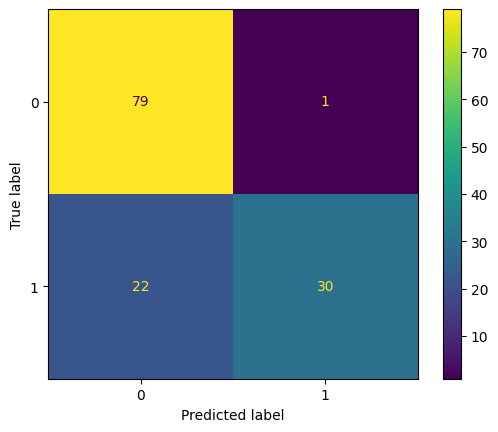

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

In [19]:

predicted_dataframe = pd.DataFrame({"Predicted": y_predict, "Actual": y_test})
print("Predicted and Actual Data frame")
print(predicted_dataframe)

Predicted and Actual Data frame
     Predicted  Actual
209          0       0
280          1       1
33           0       0
210          1       1
93           0       0
..         ...     ...
332          0       0
167          0       0
245          1       1
311          0       1
145          0       0

[132 rows x 2 columns]
